Let's start from the basics: The idea is to gather data to make an inference about the population. We use what we know (sample data) to estimate what we don't (population).

So, let's see what happens as one collects more data.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
for n in range(10, 101, 10):
    sampled = np.random.normal(loc=100, scale=15, size=n)
    print('Sampling ' + str(n) + ' observations')
    print('Mean: ' + str(np.mean(sampled)))
    print('Standard Deviation ' + str(np.std(sampled)))
    print('\n')

Sampling 10 observations
Mean: 96.54930308046485
Standard Deviation 17.69744525686926


Sampling 20 observations
Mean: 95.26529645787349
Standard Deviation 13.557714188035797


Sampling 30 observations
Mean: 99.59631039122944
Standard Deviation 16.67387851610786


Sampling 40 observations
Mean: 94.76579341950723
Standard Deviation 18.06257861698366


Sampling 50 observations
Mean: 99.61537083458882
Standard Deviation 14.897878602988285


Sampling 60 observations
Mean: 98.68203398707892
Standard Deviation 14.644083079076118


Sampling 70 observations
Mean: 100.36682454658889
Standard Deviation 15.427573719883997


Sampling 80 observations
Mean: 101.00471630426532
Standard Deviation 12.678064261146886


Sampling 90 observations
Mean: 102.7631649616841
Standard Deviation 13.03915710302493


Sampling 100 observations
Mean: 99.17823535292733
Standard Deviation 14.951583438089918




As one increases the sample size taken from the population, sample statistics will *approach* towards the **population parameter**. \
**DOES NOT NECESSARILY DECREASE!** (do not confuse std_dev and std_err) As one can see from the example above!

But *standard error* **WILL** decrease as the sample size increases. It should make sense intuitively: I have more confidence in my estimates if I know more.

In [3]:
for n in range(10, 101, 10):
    sampled = np.random.normal(loc=100, scale=15, size=n)
    print('Sampling ' + str(n) + ' observations')
    std_err = np.std(sampled) / np.sqrt(n)
    print('Standard error approximation: ' + str(std_err))
    print('\n')

Sampling 10 observations
Standard error approximation: 4.452823707231046


Sampling 20 observations
Standard error approximation: 3.798915557039333


Sampling 30 observations
Standard error approximation: 2.3932757697459746


Sampling 40 observations
Standard error approximation: 2.624220779126406


Sampling 50 observations
Standard error approximation: 2.2840746792281217


Sampling 60 observations
Standard error approximation: 2.015124706208566


Sampling 70 observations
Standard error approximation: 1.7230901229016737


Sampling 80 observations
Standard error approximation: 1.5993946754011168


Sampling 90 observations
Standard error approximation: 1.66349862578967


Sampling 100 observations
Standard error approximation: 1.577820207327762




How close is the approximation? Let's try it for one sample

In [4]:
n = 51

pop = np.random.normal(loc=100, scale=15, size=300000) # Population with normal distribution(mean=100, sd=15)

sampled = np.random.choice(pop, size=n) # randomly sampling
estimated_mean = np.mean(sampled) # sample mean
estimated_sd = np.std(sampled) # sample standard deviation

estimated_std_err = np.std(sampled) / n**.5 # estimated standard error, expected variation for my sample statistic.

print(estimated_mean, estimated_sd, estimated_std_err)

95.27311481976386 15.960503088053418 2.2349174605268747


In [5]:
# Let's take many samples and estimate the mean

mean_estimates = []

for i in range(1000): # Let's do it 1000 times, sampling 51 in each iteration.
    sampled = np.random.choice(pop, size=n)
    mean_estimates.append(np.mean(sampled))

np.std(mean_estimates)

2.1480690130242537

As one can see, it's not that far away.

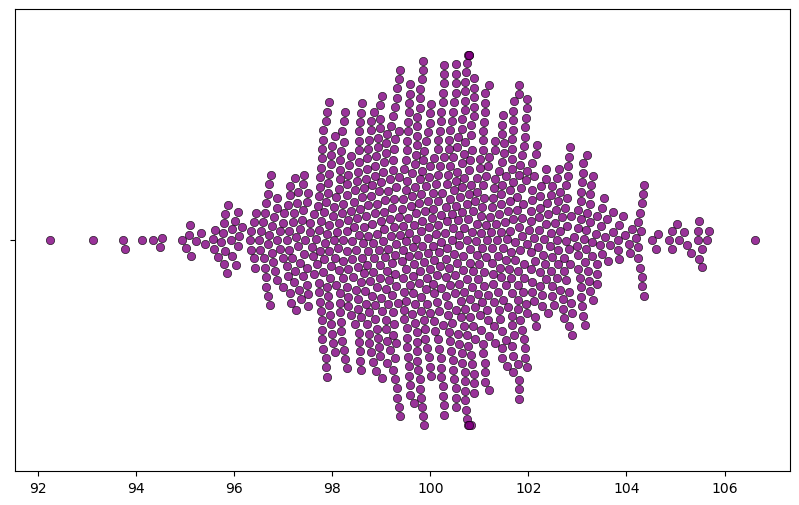

In [6]:
plt.figure(figsize=(10,6))

g = sns.swarmplot(data=mean_estimates, orient="h", size=6, alpha=.8, color="purple", linewidth=0.5,
                 edgecolor="black")

What happens when one lowers the sample size? More variation, less confidence. As the sample size increases the estimates approach towards the parameter, so with large sample size each sample ends up having similar estimates.
However, that's not the case with low sample size.

In [7]:
n = 16
mean_estimates = []

for i in range(1000): # Let's do it 1000 times
    sampled = np.random.choice(pop, size=n)
    mean_estimates.append(np.mean(sampled))

np.std(mean_estimates)

3.713500386895356

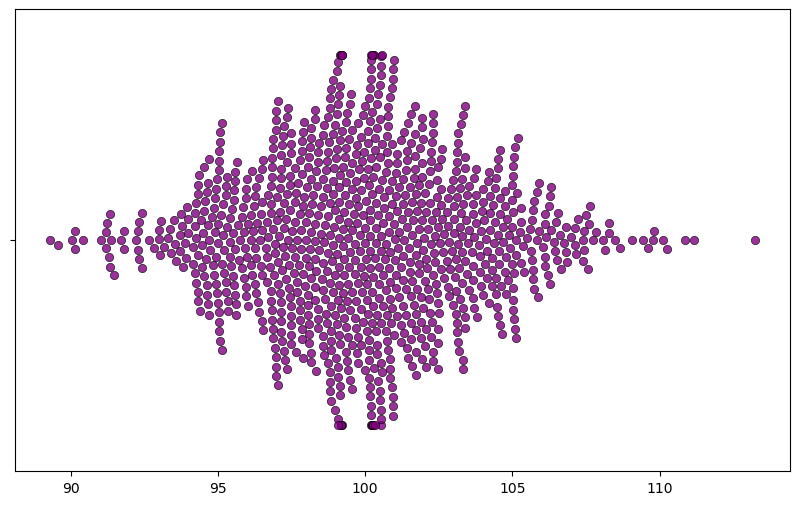

In [8]:
plt.figure(figsize=(10,6))

g = sns.swarmplot(data=mean_estimates, orient="h", size=6, alpha=.8, color="purple", linewidth=0.5,
                 edgecolor="black")

Watch out the x-axis, it's much wider now.

In [9]:
mean_estimates = {
        16:[],
        23:[],
        30:[],
        51:[],
        84:[],
        101:[]
    }

for n in [16, 23, 30, 51, 84, 101]:
    for i in range(500):
        sampled = np.random.choice(pop, size=n)
        mean_estimates[n].append(np.mean(sampled))

In [10]:
for key in mean_estimates.keys():
    print('Sample size: ' + str(key))
    print('Standard deviation (std_err) around the estimates: ' + str(np.std(mean_estimates[key])))
    print('\n')

Sample size: 16
Standard deviation (std_err) around the estimates: 3.855337925425897


Sample size: 23
Standard deviation (std_err) around the estimates: 3.1917223557725363


Sample size: 30
Standard deviation (std_err) around the estimates: 2.7639204989190023


Sample size: 51
Standard deviation (std_err) around the estimates: 2.0366022769176806


Sample size: 84
Standard deviation (std_err) around the estimates: 1.736807903528174


Sample size: 101
Standard deviation (std_err) around the estimates: 1.504399688755003


